In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [38]:
print(tf.__version__)

2.2.0


In [39]:
 !wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-31 14:28:13--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  24.4MB/s    in 13s     

2020-07-31 14:28:27 (23.5 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [40]:
# melakukan ekstraksi pada file zip
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [41]:
import os
import pandas as pd

In [72]:
mypath= '/tmp/rockpaperscissors/rps-cv-images/'

In [73]:
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(mypath):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [74]:
import pandas as pd

In [75]:
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
              1
paper       712
rock        726
scissors    750
dtype: int64

In [76]:
df.head()

,path,file_name,tag
0,/tmp/rockpaperscissors/rps-cv-images/README_rp...,README_rpc-cv-images.txt,
1,/tmp/rockpaperscissors/rps-cv-images/rock/oO3N...,oO3NO14nRLCUNjuZ.png,rock
2,/tmp/rockpaperscissors/rps-cv-images/rock/9kYP...,9kYPKMVtd4nOvSK4.png,rock
3,/tmp/rockpaperscissors/rps-cv-images/rock/5dxM...,5dxMkdp9L1r6Dv8X.png,rock
4,/tmp/rockpaperscissors/rps-cv-images/rock/UCZq...,UCZq5Q5ovMiGJLwX.png,rock


In [77]:
X= df['path']
y= df['tag']

In [78]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.39945, random_state=600)

In [79]:
df_tr = pd.DataFrame({'path':X_train
              ,'tag':y_train
             ,'set':'train'})

df_val = pd.DataFrame({'path':X_val
              ,'tag':y_val
             ,'set':'validation'})

In [108]:
df_all = df_tr.append([df_tr,df_val]).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample data sebelum file 'README_rpc-cv-images.txt' dihapus
df_all.sample(3)


set         tag     
train       paper       820
            rock        894
            scissors    914
validation                1
            paper       302
            rock        279
            scissors    293
dtype: int64 




,path,tag,set
2438,/tmp/rockpaperscissors/rps-cv-images/rock/nQ7D...,rock,train
601,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train
1336,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train


In [83]:
import shutil
from tqdm.notebook import tqdm as tq

In [ ]:
!rm README_rpc-cv-images.txt

In [84]:
datasource_path = "/tmp/rockpaperscissors/rps-cv-images/"
dataset_path = "dataset/"

In [85]:

for index, row in tq(df_all.iterrows()):
    
    #detect filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(datasource_path,row['tag'],row['image'].split('.')[0])            
    
    #make folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #define file dest
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #copy file from source to dest
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [86]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [89]:
# Parameter input 
dim = (200, 200)
channel = (3, )
input_shape = dim + channel
# Batch size
batch_size = 15
# Epoch
epoch = 15

In [91]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest',
                                   horizontal_flip=True
                                   )
validation_datagen = ImageDataGenerator(rescale=1. / 255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 fill_mode='nearest',
                                 horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  fill_mode='nearest',
                                  horizontal_flip=True)

In [92]:
train_generator = train_datagen.flow_from_directory('dataset/train/',
                                                    target_size=input_shape,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory('dataset/validation/',
                                                target_size=input_shape,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                shuffle=True)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [94]:
from keras.applications.mobilenet import MobileNet
from keras.models import Sequential,Input,Model

Using TensorFlow backend.


In [95]:
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

model_base = MobileNet(weights='imagenet',include_top=False,input_shape=(224,224,3))
model = Sequential()
model.add(model_base)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0,5))
model.add(Dense(3,activation='softmax'))
model.summary()

17227776/17225924 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3075      
Total params: 3,231,939
Trainable params: 3,210,051
Non-trainable params: 21,888
_________________________________________________________________


In [96]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [97]:
best_model_weights = './base.model'
checkpoint = ModelCheckpoint(
    best_model_weights,
    monitor='val_loss',
    verbose=2,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=10,
    verbose=2,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=9,
    write_graph=True,
    write_grads=True,
     write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)



reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=40,
    verbose=2, 
    mode='auto',
    cooldown=1 
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:92: UserWarning: The TensorBoard callback `batch_size` argument (for histogram computation) is deprecated with TensorFlow 2.0. It will be ignored.
  warnings.warn('The TensorBoard callback `batch_size` argument '
/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:97: UserWarning: The TensorBoard callback does not support gradients display when using TensorFlow 2.0. The `write_grads` argument is ignored.
  warnings.warn('The TensorBoard callback does not support '


In [111]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [112]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [113]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
tf.keras.layers.Dense(3, activation='softmax')

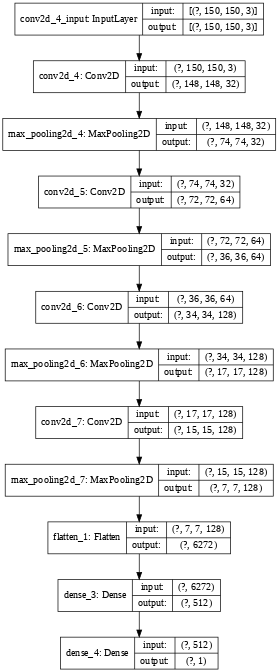

In [114]:
model_viz = tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=50)
model_viz

Saving 0Flw60Z2MAWWKn6S.png to 0Flw60Z2MAWWKn6S.png
0Flw60Z2MAWWKn6S.png
scissors


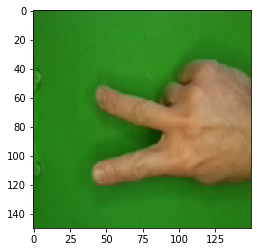

In [132]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=9)
  
  print(fn)
  if classes==0:
    print('rock')
  elif classes==1:
    print('paper')
  else:
    print('scissors')